### STAT3612 Homework 2+3
#### Name: Wong Chun Ho
#### UID: 3035277755

### Part I.

#### Step 1

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

data = pd.read_csv('BitCoin.csv', names=['Date', 'Price'])
# date = pd.to_datetime(data['Date'])
x = data.index
y = data['Price']

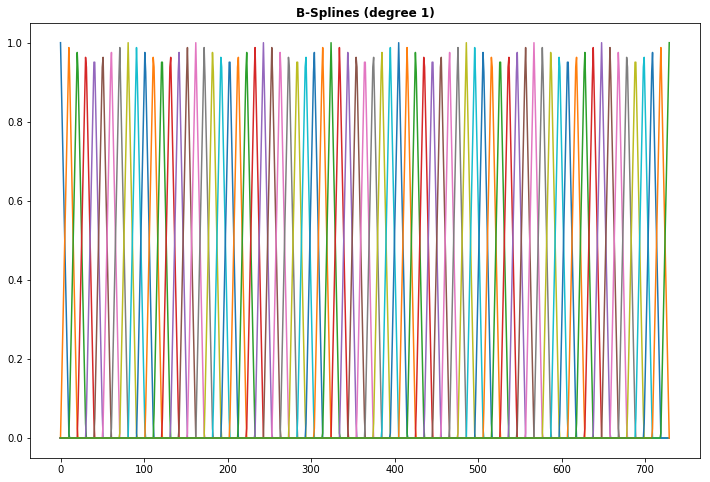

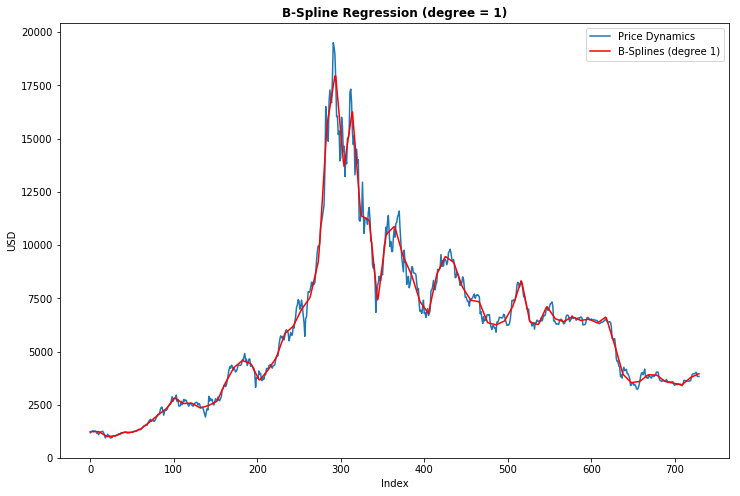

In [4]:
xphi = dmatrix("bs(x, df=73, degree=1, include_intercept=True) - 1", {"x": x})

linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

plt.subplots(figsize=(12, 8))
plt.plot(x, xphi)
plt.title('B-Splines (degree 1)', fontweight="bold")
plt.show()

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yfit, color="red")
plt.title('B-Spline Regression (degree = 1)', fontweight="bold")
plt.xlabel('Index')
plt.ylabel('USD')
plt.legend(['Price Dynamics', 'B-Splines (degree 1)'])
plt.show()

#### Step 2

C:\Users\win8\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


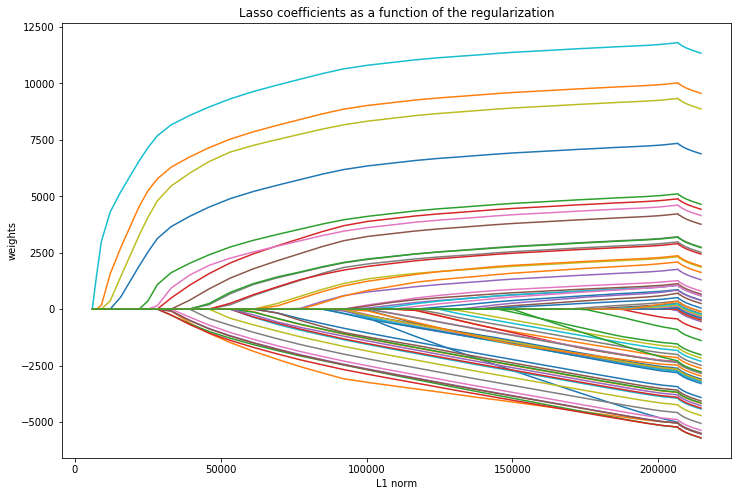

In [5]:
import numpy as np
from sklearn.linear_model import LassoCV, Lasso

alphas = np.logspace(-6, 3, 200)
l1_norm = []
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(xphi, y)
    l1_norm.append(abs(lasso.intercept_) + np.linalg.norm(lasso.coef_, ord=1))
    coefs.append(lasso.coef_)

plt.subplots(figsize=(12, 8))
plt.plot(l1_norm, coefs)
plt.xlabel('L1 norm')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### Step 3

30 important bases: 
 [   -0.         -2550.23490517 -2075.53207394 -2246.90140393
 -2020.6516682  -2042.65592547 -1878.8360971  -1569.16127464
 -1226.88272427  -933.59553539  -423.27187459  -681.42880881
  -666.50411443  -886.32025427  -806.27044952  -497.90737759
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.             0.
     0.             0.             0.          1278.56896196
  7753.31269419 10190.39305986  5742.10683994  8405.64442845
  3544.72892152  3128.95903805     0.          2465.10738468
  3030.31109509  1626.21909082   570.41563122     0.
     0.           466.73813463  1647.34079517  1307.10840858
    29.90619101     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.      

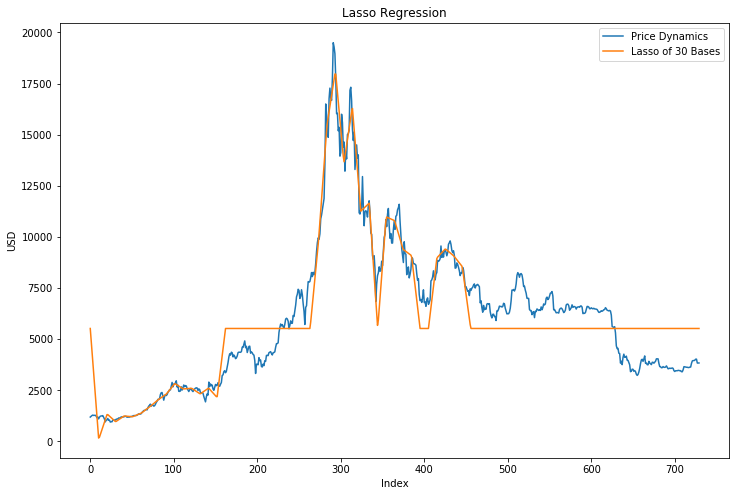

In [6]:
# Select subset of bases having 30 non-zero coefs from the solution paths
bases = []
for b in coefs:
    if len(b[b != 0]) == 30:
        bases = b
        break

print('30 important bases: \n', bases)

# Eliminate bases with coef = 0
xphi2 = xphi[:,bases != 0]
        
linreg2 = LinearRegression()
linreg2.fit(xphi2, y)
yfit2 = linreg2.predict(xphi2)

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yfit2)
plt.xlabel('Index')
plt.ylabel('USD')
plt.title('Lasso Regression')
plt.legend(['Price Dynamics', 'Lasso of 30 Bases'])
plt.show()

#### Step 4

Best Regularization Parameter:  2.0


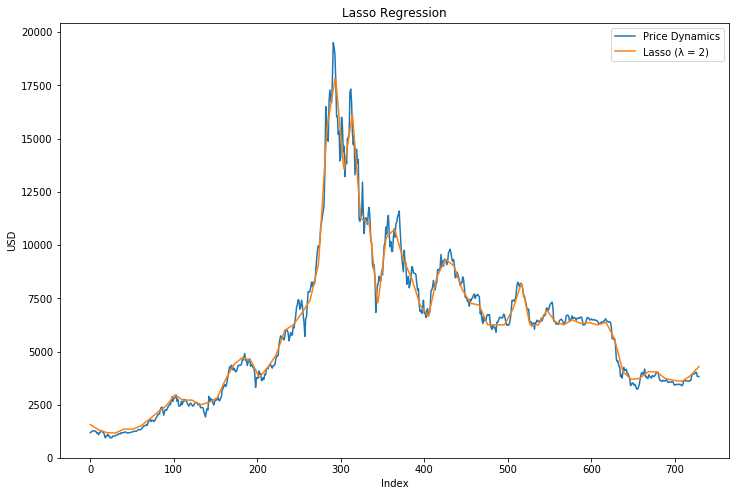

In [7]:
alphas = np.linspace(.00001, 2, 500)
# 5-folded cross-validation is used here.
lassoreg = LassoCV(alphas=alphas, cv=5, normalize=True)
lassoreg.fit(xphi, y)

print('Best Regularization Parameter: ', lassoreg.alpha_)

linreg_lasso = Lasso(alpha=lassoreg.alpha_)
linreg_lasso.fit(xphi, y)
yhat_lasso = linreg_lasso.predict(xphi)

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yhat_lasso)
plt.xlabel('Index')
plt.ylabel('USD')
plt.title('Lasso Regression')
plt.legend(['Price Dynamics', 'Lasso (λ = 2)'])
plt.show()

### Part II.

#### Step 1

In [8]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer['feature_names'])
X = X.iloc[:,0:10]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
import statsmodels.api as sm

y = cancer.target # 0 = malignant, 1 = benign
X1 = sm.add_constant(X)
logreg = sm.Logit(y,X1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.128410
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Thu, 02 May 2019   Pseudo R-squ.:                  0.8055
Time:                        14:08:31   Log-Likelihood:                -73.065
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                1.282e-123
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.3595     12.853      0.573      0.567     -17.831     

In [13]:
print('Four most important features (p-value < 0.05) :')
print('mean radius')
print('mean area')
print('mean smoothness')
print('mean concave points')

Four most important features (p-value < 0.05) :
mean radius
mean area
mean smoothness
mean concave points


#### Step 2

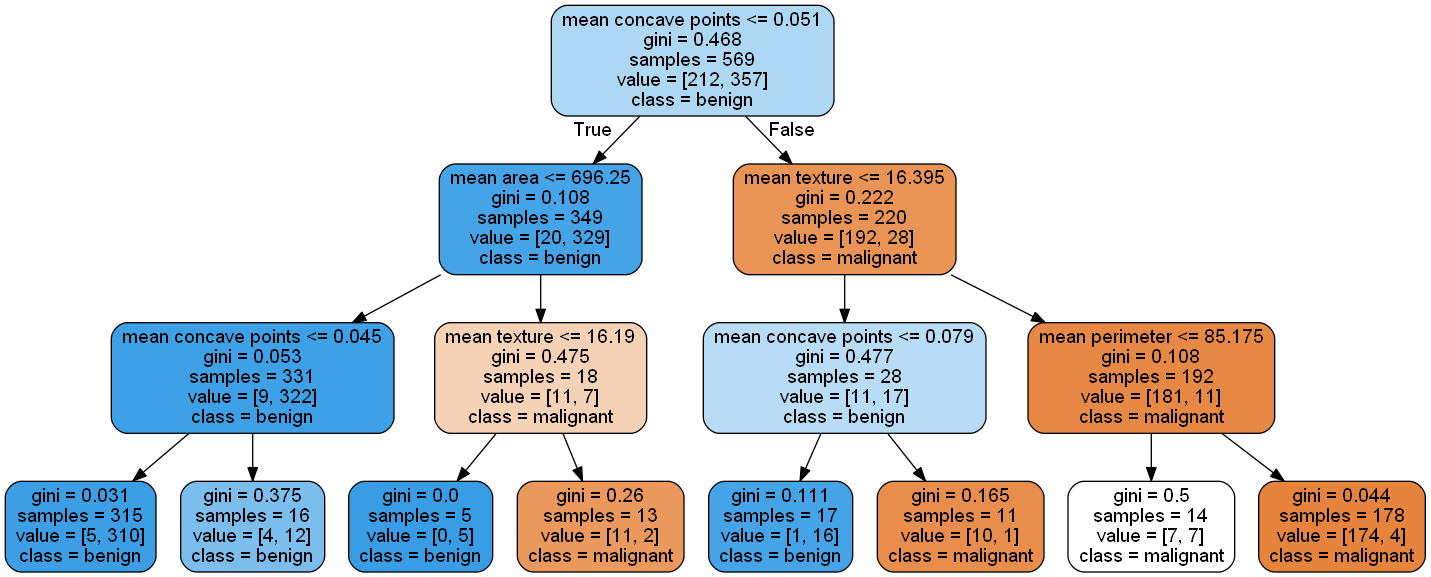

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

export_graphviz(
        tree_clf,
        out_file="cancer_tree.dot",
        feature_names=cancer['feature_names'][0:10],
        class_names=cancer['target_names'],
        rounded=True,
        filled=True
    )

!dot -Tpng cancer_tree.dot -o cancer_tree.png

from IPython.display import Image
Image("cancer_tree.png")

In [59]:
yhat = tree_clf.predict(X)
diff = yhat - y
accuracy = len(diff[diff==0])/len(y)
print('Training Accuracy (Tree) =', round(accuracy, 4))

Training Accuracy (Tree) = 0.9578


#### Step 3

In [50]:
from sklearn import svm

# SVM Linear
svm_linear = svm.SVC(kernel = 'linear', gamma=0.3)
svm_linear.fit(X, y)

yhat = svm_linear.predict(X)
diff = yhat - y
accuracy = len(diff[diff==0])/len(y)
print('Training Accuracy (Linear) =', round(accuracy, 4))

Training Accuracy (Linear) = 0.9192


In [55]:
# SVM RBF
svm_rbf = svm.SVC(kernel = 'rbf', gamma=0.3)
svm_rbf.fit(X, y)

yhat = svm_rbf.predict(X)
diff = yhat - y
accuracy = len(diff[diff==0])/len(y)
print('Training Accuracy (RBF) =', round(accuracy, 4))

Training Accuracy (RBF) = 0.9965


#### Step 4

In [60]:
from sklearn.neural_network import MLPClassifier

np.random.seed(0)
mlp_clf = MLPClassifier(hidden_layer_sizes = [100], activation='relu', solver='adam')
mlp_clf.fit(X, y)

yhat = mlp_clf.predict(X)
yhat
diff = yhat - y
accuracy = len(diff[diff==0])/len(y)
print('Training Accuracy (MPL) =', round(accuracy, 4))

Training Accuracy (MPL) = 0.8629
